# sensor fusion example


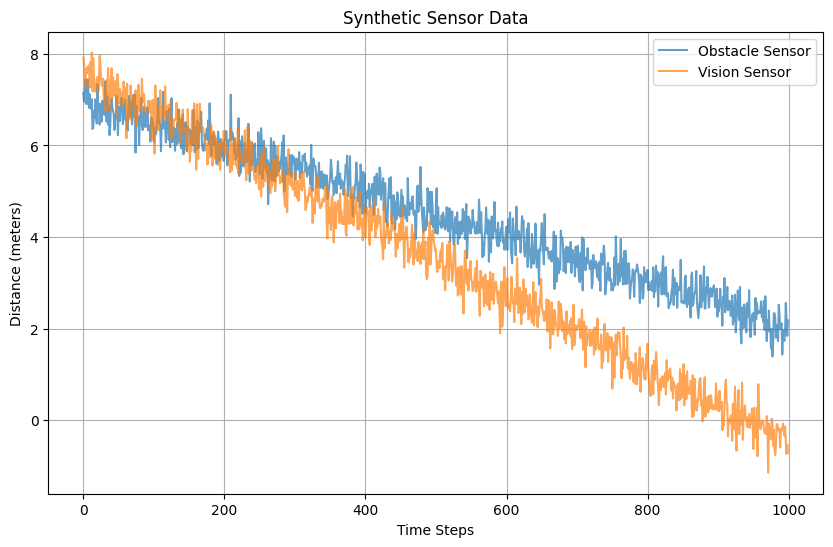

In [49]:

import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_samples = 1000
time = np.arange(num_samples)

# Generate obstacle sensor data (distance in meters)
obstacle_sensor_noise = np.random.normal(0, 0.3, num_samples)
obstacle_sensor_data = 7 - 0.005 * time + obstacle_sensor_noise

# Generate vision-based meter data (distance in meters)
vision_sensor_noise = np.random.normal(0, 0.3, num_samples)
vision_sensor_data = 7.5 - 0.008 * time + vision_sensor_noise

# Plot the synthetic datasets
plt.figure(figsize=(10, 6))
plt.plot(time, obstacle_sensor_data, label='Obstacle Sensor', alpha=0.7)
plt.plot(time, vision_sensor_data, label='Vision Sensor', alpha=0.7)
plt.title('Synthetic Sensor Data')
plt.xlabel('Time Steps')
plt.ylabel('Distance (meters)')
plt.legend()
plt.grid(True)
plt.show()


# averaging


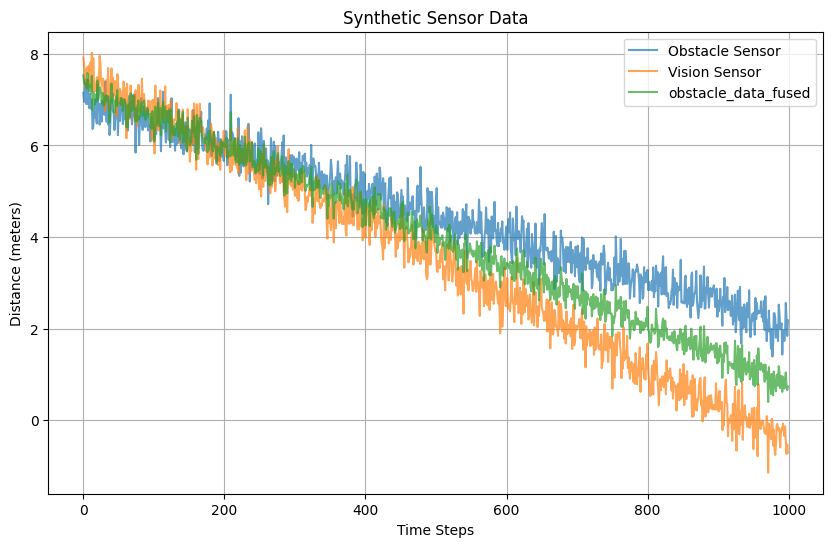

In [50]:
obstacle_data_fused= (obstacle_sensor_data+vision_sensor_data)/2

# Plot the synthetic datasets
plt.figure(figsize=(10, 6))
plt.plot(time, obstacle_sensor_data, label='Obstacle Sensor', alpha=0.7)
plt.plot(time, vision_sensor_data, label='Vision Sensor', alpha=0.7)
plt.plot(time, obstacle_data_fused, label='obstacle_data_fused', alpha=0.7)
plt.title('Synthetic Sensor Data')
plt.xlabel('Time Steps')
plt.ylabel('Distance (meters)')
plt.legend()
plt.grid(True)
plt.show()

# perform linear regression for sensor 1, sensor2 and get the evarage slope, intercept from two regressors

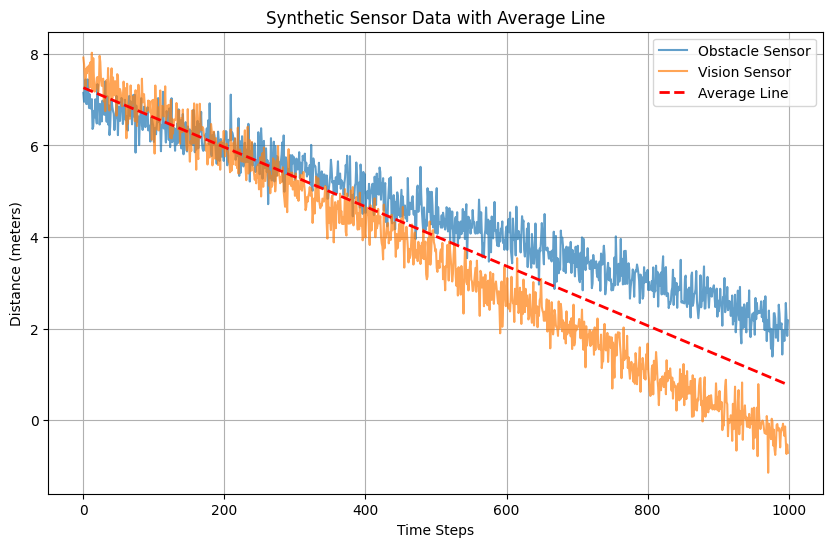

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform linear regression for obstacle sensor data
slope_obstacle, intercept_obstacle, _, _, _ = linregress(time, obstacle_sensor_data)

# Perform linear regression for vision sensor data
slope_vision, intercept_vision, _, _, _ = linregress(time, vision_sensor_data)

# Calculate the average slope and intercept
average_slope = (slope_obstacle + slope_vision) / 2
average_intercept = (intercept_obstacle + intercept_vision) / 2

# Calculate the average line using the average parameters
average_line = average_slope * time + average_intercept

# Plot the synthetic datasets and the average line
plt.figure(figsize=(10, 6))
plt.plot(time, obstacle_sensor_data, label='Obstacle Sensor', alpha=0.7)
plt.plot(time, vision_sensor_data, label='Vision Sensor', alpha=0.7)
plt.plot(time, average_line, label='Average Line', linestyle='--', color='red', linewidth=2)
plt.title('Synthetic Sensor Data with Average Line')
plt.xlabel('Time Steps')
plt.ylabel('Distance (meters)')
plt.legend()
plt.grid(True)
plt.show()




# Error model and minimization


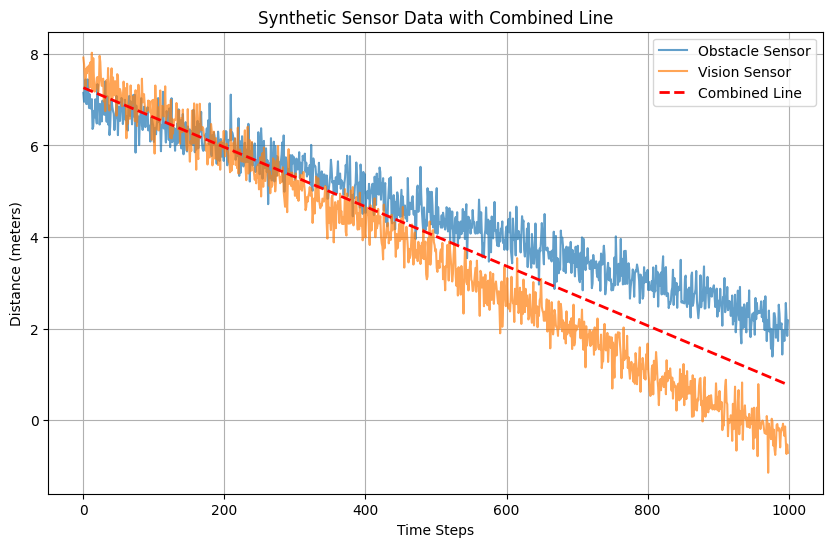

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize




# Combine the data from both sensors
combined_data = np.concatenate([obstacle_sensor_data, vision_sensor_data])

# Define the error function to minimize
def error(params, x, y):
    a, b = params
    return np.sum((y - (a * x + b))**2)

# Initial guess for parameters
initial_params = [1, 1]

# Reshape the combined_data to match the shape of the parameters
combined_data = combined_data.reshape((2, -1))

# Minimize the error function
result = minimize(error, initial_params, args=(time, combined_data))

# Extract the optimized parameters
a, b = result.x

# Calculate the combined line using the optimized parameters
combined_line = a * time + b

# Plot the synthetic datasets and the combined line
plt.figure(figsize=(10, 6))
plt.plot(time, obstacle_sensor_data, label='Obstacle Sensor', alpha=0.7)
plt.plot(time, vision_sensor_data, label='Vision Sensor', alpha=0.7)
plt.plot(time, combined_line, label='Combined Line', linestyle='--', color='red', linewidth=2)
plt.title('Synthetic Sensor Data with Combined Line')
plt.xlabel('Time Steps')
plt.ylabel('Distance (meters)')
plt.legend()
plt.grid(True)
plt.show()


## smooth data and filter the noise

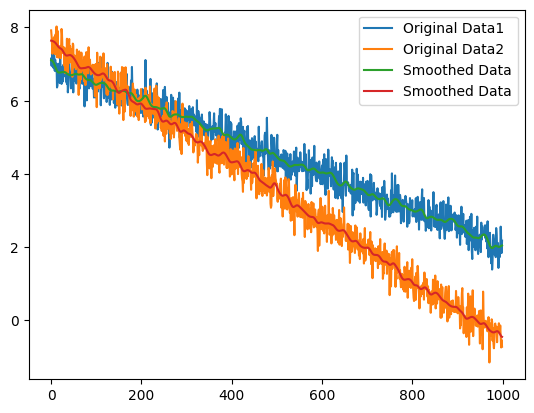

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Generate synthetic data
x = np.linspace(0, 10, 100)



# Apply Gaussian smoothing
obstacle_sensor_data_smoothed = gaussian_filter1d(obstacle_sensor_data, sigma=5)
vision_sensor_data_smoothed = gaussian_filter1d(vision_sensor_data, sigma=1)

# Plot the original and smoothed data
plt.plot(time, obstacle_sensor_data, label='Original Data1')
plt.plot(time, vision_sensor_data, label='Original Data2')
plt.plot(time, obstacle_sensor_data_smoothed, label='Smoothed Data')
plt.plot(time, vision_sensor_data_smoothed, label='Smoothed Data')
plt.legend()
plt.show()


# compute the fused data through MLE

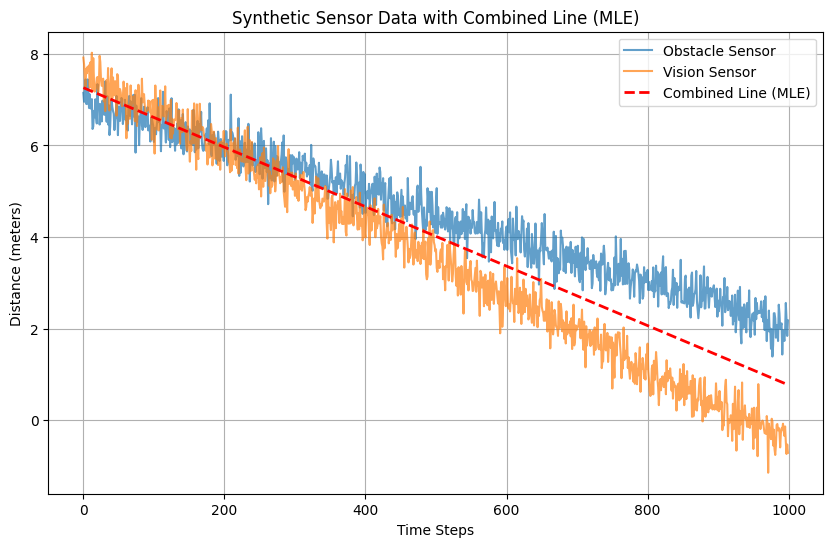

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


# Combine the data from both sensors
combined_data = np.concatenate([obstacle_sensor_data, vision_sensor_data])

# Define the likelihood function for a linear regression model
def likelihood(params, x, y):
    a, b, sigma = params
    y_pred = a * x + b
    likelihood_terms = -0.5 * (np.log(2 * np.pi * sigma**2) + ((y - y_pred) / sigma)**2)
    return np.sum(likelihood_terms)

# Initial guess for parameters
initial_params = [1, 1, 1]
# Reshape the combined_data to match the shape of the parameters
combined_data = combined_data.reshape((2, -1))


# Minimize the negative log-likelihood function
result = minimize(lambda params: -likelihood(params, time, combined_data), initial_params)

# Extract the optimized parameters
a, b, sigma = result.x

# Calculate the combined line using the optimized parameters
combined_line = a * time + b

# Plot the synthetic datasets and the combined line
plt.figure(figsize=(10, 6))
plt.plot(time, obstacle_sensor_data, label='Obstacle Sensor', alpha=0.7)
plt.plot(time, vision_sensor_data, label='Vision Sensor', alpha=0.7)
plt.plot(time, combined_line, label='Combined Line (MLE)', linestyle='--', color='red', linewidth=2)
plt.title('Synthetic Sensor Data with Combined Line (MLE)')
plt.xlabel('Time Steps')
plt.ylabel('Distance (meters)')
plt.legend()
plt.grid(True)
plt.show()


# convert it to a class

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import minimize
from scipy.ndimage import gaussian_filter1d

class SensorFusion:
    def __init__(self, time, obstacle_sensor_data, vision_sensor_data):
        self.time = time
        self.obstacle_sensor_data = obstacle_sensor_data
        self.vision_sensor_data = vision_sensor_data

    def plot_sensor_data(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.time, self.obstacle_sensor_data, label='Obstacle Sensor', alpha=0.7)
        plt.plot(self.time, self.vision_sensor_data, label='Vision Sensor', alpha=0.7)
        plt.title('Synthetic Sensor Data')
        plt.xlabel('Time Steps')
        plt.ylabel('Distance (meters)')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_fused_data(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.time, self.obstacle_sensor_data, label='Obstacle Sensor', alpha=0.7)
        plt.plot(self.time, self.vision_sensor_data, label='Vision Sensor', alpha=0.7)
        plt.plot(self.time, self.obstacle_data_fused, label='Obstacle Data Fused', alpha=0.7)
        plt.title('Synthetic Sensor Data with Fusion')
        plt.xlabel('Time Steps')
        plt.ylabel('Distance (meters)')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_result(self, fusion_function, *args, **kwargs):
        result = fusion_function(*args, **kwargs)
        plt.figure(figsize=(10, 6))
        plt.plot(self.time, self.obstacle_sensor_data, label='Obstacle Sensor', alpha=0.7)
        plt.plot(self.time, self.vision_sensor_data, label='Vision Sensor', alpha=0.7)
        plt.plot(self.time, result, label=f'{fusion_function.__name__} Result', linestyle='--', color='red', linewidth=2)
        plt.title(f'Synthetic Sensor Data with {fusion_function.__name__} Result')
        plt.xlabel('Time Steps')
        plt.ylabel('Distance (meters)')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_smoothed_data(self, sigma=5):
        obstacle_sensor_data_smoothed = gaussian_filter1d(self.obstacle_sensor_data, sigma=sigma)
        vision_sensor_data_smoothed = gaussian_filter1d(self.vision_sensor_data, sigma=sigma)

        plt.plot(self.time, self.obstacle_sensor_data, label='Original Data (Obstacle Sensor)')
        plt.plot(self.time, self.vision_sensor_data, label='Original Data (Vision Sensor)')
        plt.plot(self.time, obstacle_sensor_data_smoothed, label='Smoothed Data (Obstacle Sensor)')
        plt.plot(self.time, vision_sensor_data_smoothed, label='Smoothed Data (Vision Sensor)')
        plt.legend()
        plt.show()

    def _error(self, params, x, y):
        a, b = params
        return np.sum((y - (a * x + b))**2)

    def _likelihood(self, params):
        a, b, sigma = params
        y_pred_obstacle = a * self.time + b
        likelihood_obstacle = -0.5 * (np.log(2 * np.pi * sigma**2) + ((self.obstacle_sensor_data - y_pred_obstacle) / sigma)**2)

        y_pred_vision = a * self.time + b
        likelihood_vision = -0.5 * (np.log(2 * np.pi * sigma**2) + ((self.vision_sensor_data - y_pred_vision) / sigma)**2)

        return np.sum(likelihood_obstacle + likelihood_vision)

    def average_line_fusion(self):
        slope_obstacle, intercept_obstacle, _, _, _ = linregress(self.time, self.obstacle_sensor_data)
        slope_vision, intercept_vision, _, _, _ = linregress(self.time, self.vision_sensor_data)
        average_slope = (slope_obstacle + slope_vision) / 2
        average_intercept = (intercept_obstacle + intercept_vision) / 2
        return average_slope * self.time + average_intercept

    def combined_line_fusion(self):
        combined_data = np.concatenate([self.obstacle_sensor_data, self.vision_sensor_data])
        initial_params = [1, 1]
        combined_data = combined_data.reshape((2, -1))
        result = minimize(self._error, initial_params, args=(self.time, combined_data))
        a, b = result.x
        return a * self.time + b

    def combined_line_mle_fusion(self):
        combined_data = np.concatenate([self.obstacle_sensor_data, self.vision_sensor_data])
        initial_params = [1, 1, 1]
        combined_data = combined_data.reshape((2, -1))
        result = minimize(lambda params: -self._likelihood(params), initial_params)
        a, b, _ = result.x
        return a * self.time + b



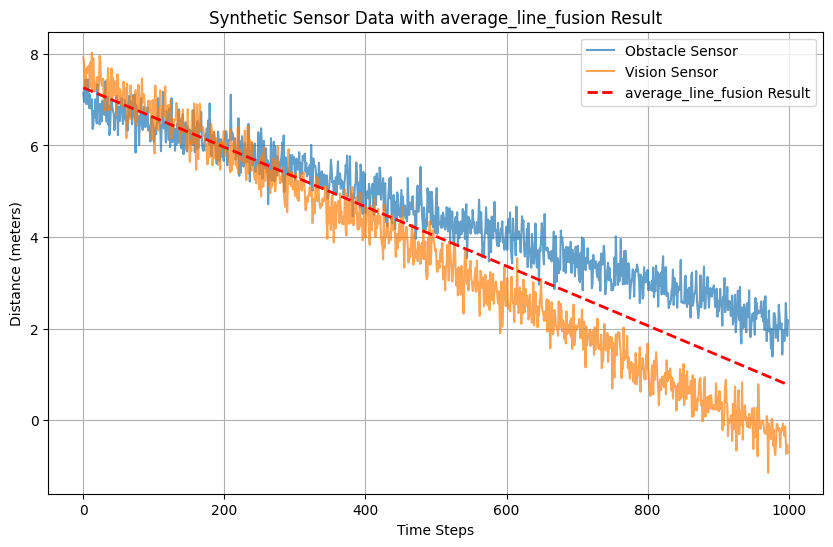

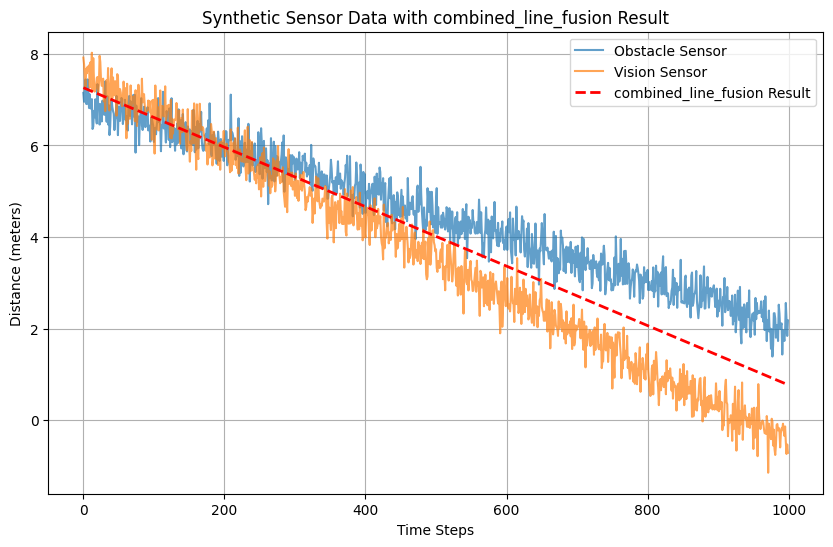

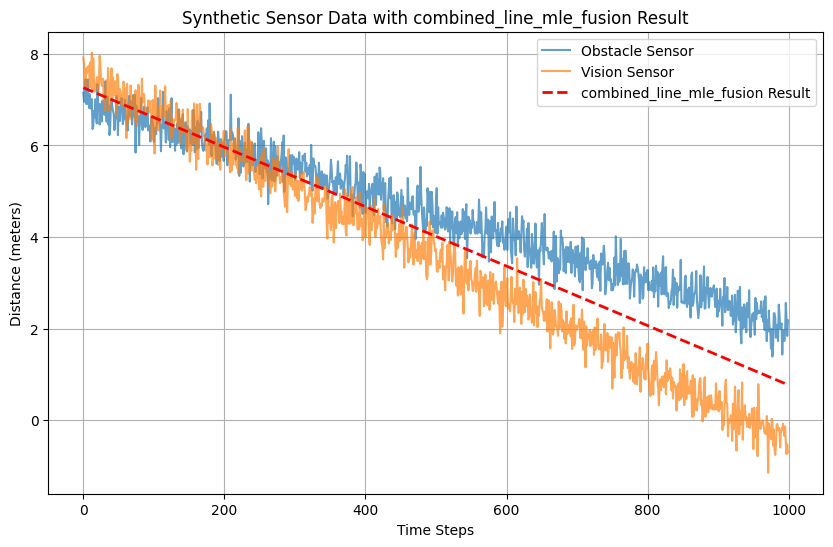

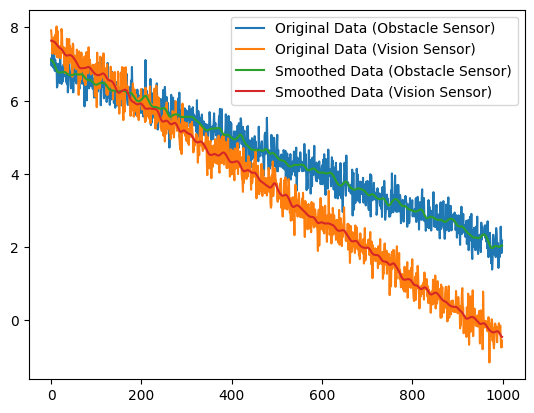

In [87]:
# Create an instance of SensorFusion
sensor_fusion = SensorFusion(time, obstacle_sensor_data, vision_sensor_data)

# Plot the results
sensor_fusion.plot_result(sensor_fusion.average_line_fusion)
sensor_fusion.plot_result(sensor_fusion.combined_line_fusion)
sensor_fusion.plot_result(sensor_fusion.combined_line_mle_fusion)
sensor_fusion.plot_smoothed_data()
